In [1]:
import networkx as nx
import random

def generate_random_dag(num_nodes):
    G = nx.DiGraph()
    for node in range(1, num_nodes):
        possible_parents = list(range(node))
        random.shuffle(possible_parents)
        num_parents = random.randint(1, min(3, len(possible_parents)))
        parents = possible_parents[:num_parents]
        for parent in parents:
            G.add_edge(parent, node)
    return G

# Generate 100 random DAGs
num_dags = 10
random_dags = [generate_random_dag(15) for _ in range(num_dags)]


In [2]:
random_dags[0].

In [3]:
import numpy as np

# Extract the number of nodes from each generated DAG
node_counts = [len(G.edges) for G in random_dags]

# Shuffle the data
combined_data = list(zip(random_dags, node_counts))
random.shuffle(combined_data)
random_dags, node_counts = zip(*combined_data)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(num_dags * split_ratio)
import numpy as np

max_num_nodes = 10  # Define a maximum number of nodes
def preprocess_graph(G):
    # Create an adjacency matrix with shape (max_num_nodes, max_num_nodes)
    adj_matrix = nx.to_numpy_matrix(G, nodelist=range(max_num_nodes))
    return adj_matrix

train_data = random_dags[:split_index]
train_labels = np.array(node_counts[:split_index])
test_data = random_dags[split_index:]
test_labels = np.array(node_counts[split_index:])

# Preprocess the data
train_data = [preprocess_graph(G) for G in train_data]
test_data = [preprocess_graph(G) for G in test_data]

# Convert to NumPy arrays and reshape
train_data = 2*np.array(train_data)
test_data = 2*np.array(test_data)

# Reshape the data to have a batch size of 1
train_data = train_data.reshape(-1, max_num_nodes, max_num_nodes)
test_data = test_data.reshape(-1, max_num_nodes, max_num_nodes)



In [5]:
train_data.shape

(8, 10, 10)

In [158]:
import tensorflow as tf

# Define a simple feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10, 10)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_data, train_labels, epochs=400, batch_size = 32, validation_data=(test_data, test_labels))


Epoch 1/400
1/1 [==============================] - 0s 283ms/step - loss: 671.0469 - val_loss: 681.0671
Epoch 2/400
1/1 [==============================] - 0s 15ms/step - loss: 660.8636 - val_loss: 670.8132
Epoch 3/400
1/1 [==============================] - 0s 12ms/step - loss: 650.7788 - val_loss: 660.6163
Epoch 4/400
1/1 [==============================] - 0s 15ms/step - loss: 640.8151 - val_loss: 650.4077
Epoch 5/400
1/1 [==============================] - 0s 15ms/step - loss: 631.1562 - val_loss: 640.2003
Epoch 6/400
1/1 [==============================] - 0s 15ms/step - loss: 621.6288 - val_loss: 630.0178
Epoch 7/400
1/1 [==============================] - 0s 15ms/step - loss: 611.9857 - val_loss: 619.8320
Epoch 8/400
1/1 [==============================] - 0s 15ms/step - loss: 602.3937 - val_loss: 609.6600
Epoch 9/400
1/1 [==============================] - 0s 15ms/step - loss: 592.8910 - val_loss: 599.5223
Epoch 10/400
1/1 [==============================] - 0s 16ms/step - loss: 583.4415

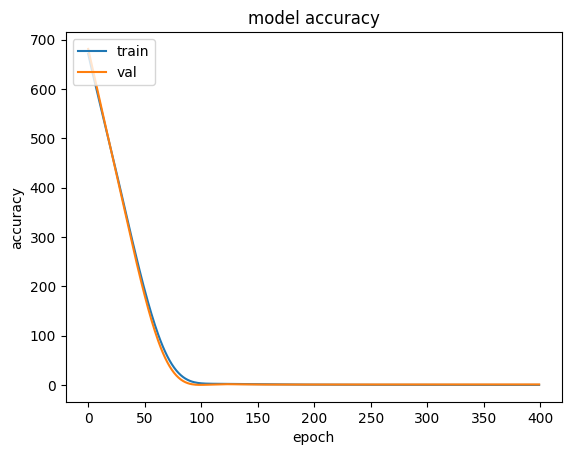

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [145]:
model.predict(test_data[1])

1/1 [==============================] - 0s 13ms/step


array([[18.019371]], dtype=float32)

In [146]:
test_labels[1]

18

In [142]:
# Evaluate the model
evaluation = model.evaluate(test_data, test_labels, verbose=0)

# Calculate additional metrics (e.g., MAE)
from sklearn.metrics import mean_absolute_error

# Make predictions on the test data
predictions = model.predict(test_data)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)

print(f'Mean Squared Error (MSE): {evaluation}')
print(f'Mean Absolute Error (MAE): {mae}')


7/7 [==============================] - 0s 485us/step
Mean Squared Error (MSE): 0.006784947123378515
Mean Absolute Error (MAE): 0.06445360660552979
